# PROJECT TITLE : SALES DATA ANALYSIS

 

## 🎯 Objective:
The goal of this project is to analyze sales data to uncover key trends in:
- Total Sales & Order Status
- Country-wise performance
- Product Line and Order Patterns
- Profit-driving regions and months

By identifying these patterns  OUR aim to help business owners:
- Target high-performing markets
- Improve inventory and shipping decisions
- Maximize revenue by focusing on the most profitable locations and timelines


In [14]:
import pandas as pd 
import matplotlib . pyplot as plt 
import gender_guesser.detector as gender

df = pd.read_csv("sales_data_sample.csv",encoding="latin1")
#cleaning data
COLUMNS=['ORDERNUMBER','QUANTITYORDERED','PRICEEACH','ORDERLINENUMBER','SALES','ORDERDATE','STATUS','QTR_ID','MONTH_ID','YEAR_ID','PRODUCTLINE','MSRP','PRODUCTCODE','CUSTOMERNAME','PHONE','ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE','COUNTRY','TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME','DEALSIZE']
numeric_columns = df.select_dtypes(include='number').columns
non_numeric_columns = df.select_dtypes(exclude="number").columns




  # 🎯 AIM:  
 CREATED A NEW "GENDER" COLUMN FOR GETTING BETTER PLOT AND TO ANALYSE RELATION BETWEEN  PRODUCTLINE AND GENDER.

 # 📌 Insight: 
 Female customers showed higher interest in classic cars and planes.

  Product lines like 'Vintage Cars' and 'Trains' were more evenly split.

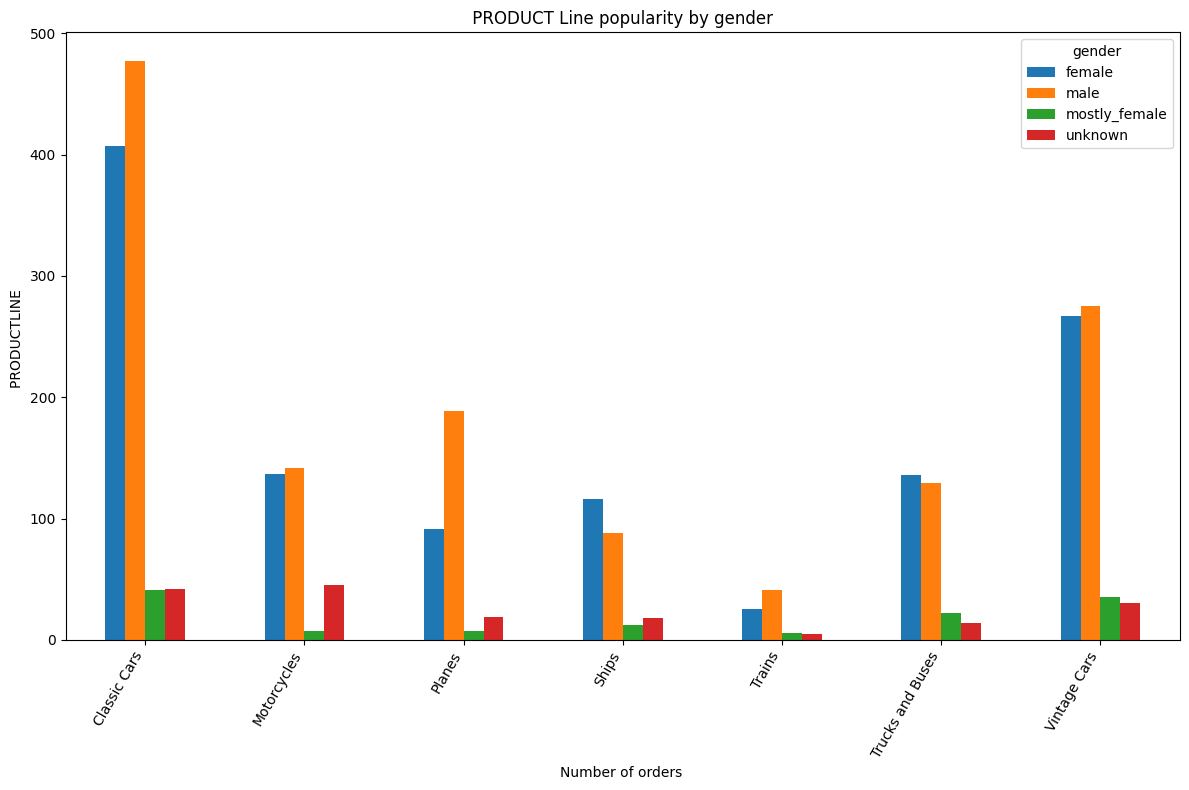

In [15]:
import pandas as pd 
import matplotlib . pyplot as plt 
import gender_guesser.detector as gender
d = gender.Detector()

df["first_name"] = df["CONTACTFIRSTNAME"].apply(lambda x: x.split()[0])
df['gender'] = df["first_name"].apply(d.get_gender)

df["gender"] = df ["gender"].replace({
    "mostly_male": "male",
    "mostly_females":"females",
    "andy":"unknown"
      })

gender =(df[["CONTACTFIRSTNAME","first_name","gender"]])
df[numeric_columns]=df[numeric_columns].fillna(df[numeric_columns].mean())
for col in non_numeric_columns:
    df[col] = df[col].fillna("unknown")


#GENDER VS PRODUCTTLINE


quantity = df.groupby(["PRODUCTLINE", "gender"]).size().unstack(fill_value=0)

quantity.plot(kind ="bar",figsize=(12,8))

plt.title(" PRODUCT Line popularity by gender ")
plt.xlabel("Number of orders ")
plt.ylabel("PRODUCTLINE ")
plt.xticks(rotation= 60 ,ha = "right")
plt.tight_layout()
plt.show()

# AIM OF LINE CHART
A DIFFERENCE  BETWEEN MONTH ID TO QUANTITY ORDERED AND PRICE EACH 
# INSIGHTS:

 An inverse relation is observed — higher prices tend to result in lower quantities.  
 
However, Month 11 broke the pattern with high pricing and a spike in quantity ordered — possibly due to festive season promotions.

- Quantity spikes in March and December indicate promotional or seasonal impact.

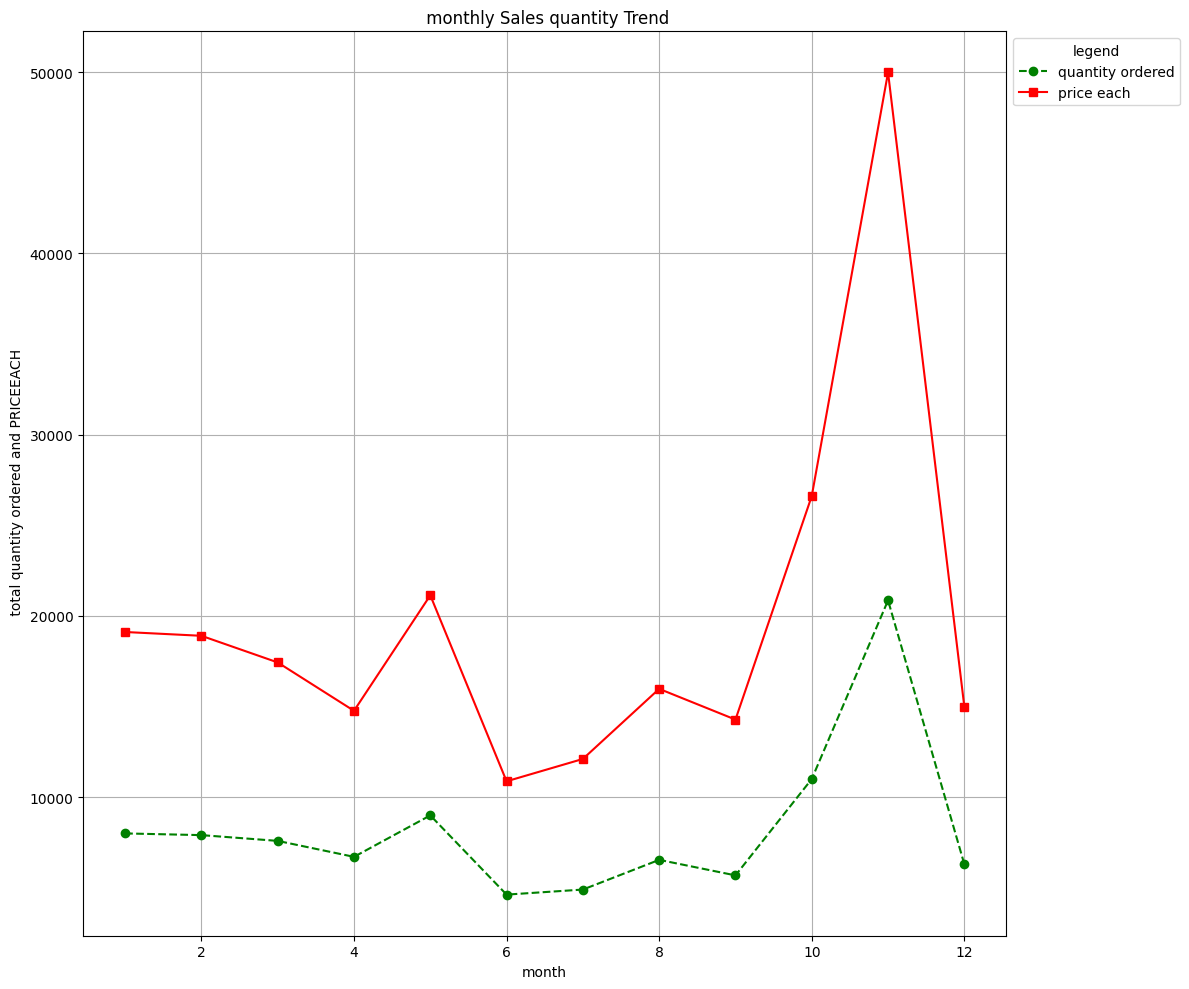

In [16]:
#linechart

month_quantity = df.groupby("MONTH_ID")[["QUANTITYORDERED","PRICEEACH"]].sum()
plt.figure(figsize=(12,10))
plt.plot(month_quantity.index,month_quantity["QUANTITYORDERED"],marker="o",linestyle= "--",color= "green",label="quantity ordered")
plt.plot(month_quantity.index,month_quantity["PRICEEACH"],marker="s",linestyle= "-",color= "red",label="price each")

plt.title(" monthly Sales quantity Trend")
plt.xlabel("month")
plt.ylabel(" total quantity ordered and PRICEEACH")
plt.grid()
plt.legend(title="legend", bbox_to_anchor=(1,1), loc='upper left')
plt.tight_layout()
plt.show()

# AIM :
 Analyze how different countries compare in terms of quantity ordered and unit price.
# INSIGHTS :
WHICH COUNTRY HAVE MAXIMUM QUANTITY ORDERED AND WHAT AVG PRICE COUNTRY HAVE 
USA HAS THE HIGHEST PRICE OF EACH QUANTITY AND HIGHEST QUANTITY IS ORDERED 
TOP 3 COUNTRIES BY QUANTITY AND PRICE :
 1. USA
 2. SPAIN
 3. FRANCE



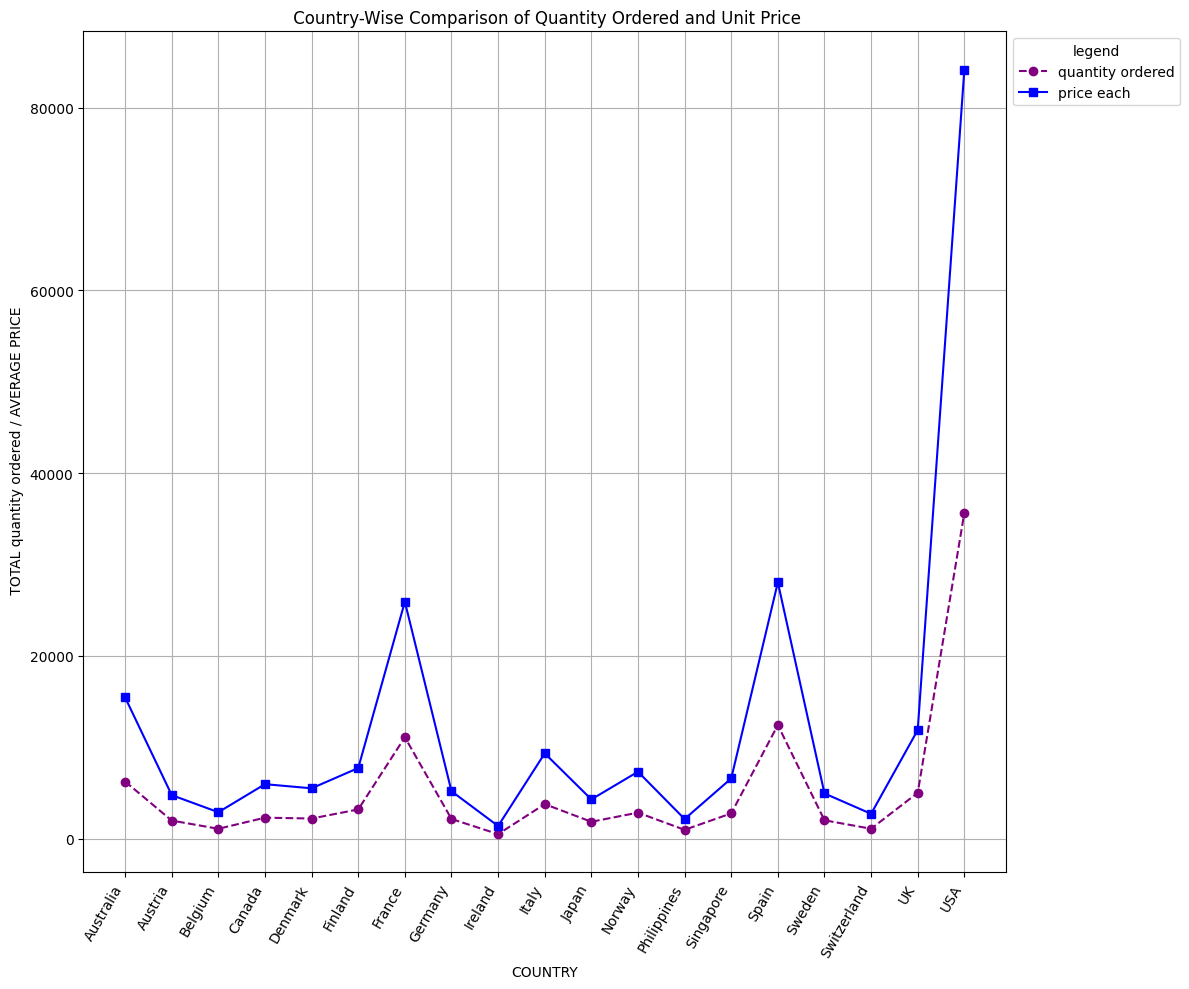

In [17]:
month_quantity = df.groupby("COUNTRY")[["QUANTITYORDERED","PRICEEACH"]].sum()
plt.figure(figsize=(12,10))
plt.plot(month_quantity.index,month_quantity["QUANTITYORDERED"],marker="o",linestyle= "--",color= "purple",label="quantity ordered")
plt.plot(month_quantity.index,month_quantity["PRICEEACH"],marker="s",linestyle= "-",color= "blue",label="price each")

plt.title(" Country-Wise Comparison of Quantity Ordered and Unit Price")
plt.xlabel("COUNTRY")
plt.ylabel(" TOTAL quantity ordered / AVERAGE PRICE")
plt.grid()
plt.xticks(rotation= 60 ,ha = "right")
plt.legend(title="legend", bbox_to_anchor=(1,1), loc='upper left')
plt.tight_layout()
plt.show()

# AIM:
RELATION BETWEEN DEAL SIZE AND SALES 

 # INSIGHTS 
 ANALYSIZE HIGHER DEAL SIZE GIVES HIGHER SALES 
  Large deal sizes generated almost **twice the sales** compared to medium-sized deals — suggesting high-value transactions drive revenue.


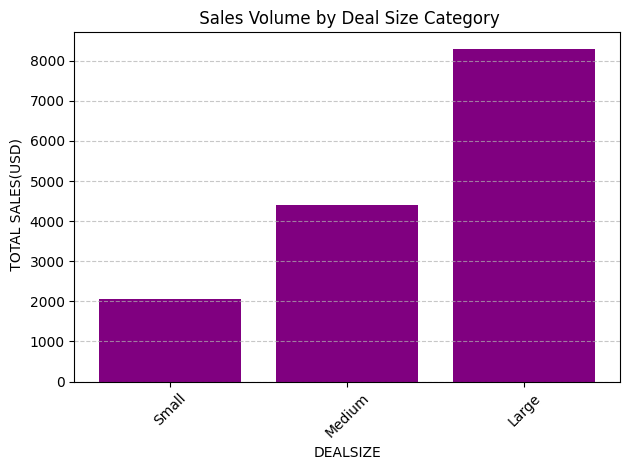

In [18]:
#BAR CHART 

DEAL_SIZE = df.groupby("DEALSIZE")["SALES"].mean().reindex(["Small","Medium","Large"])
plt.Figure(figsize=(10,8))
plt.bar(DEAL_SIZE.index,DEAL_SIZE.values,color = ["purple"])
plt.title(" Sales Volume by Deal Size Category")
plt.xlabel("DEALSIZE")
plt.ylabel(" TOTAL SALES(USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


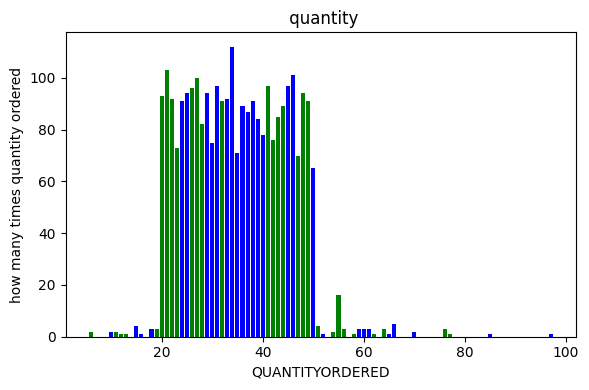

In [19]:

#bar chart

type_counts = df['QUANTITYORDERED'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['blue','green'])
plt.title(" quantity")
plt.xlabel("QUANTITYORDERED")
plt.ylabel("how many times quantity ordered")
plt.tight_layout()
plt.show()



# AIM: 
 GRAPH BETWEEN CUSTOMER WITH HIGEST SALES 


# INSIGHTS:
The company **Ero Shopping Channel** recorded the highest sales among all companies, with total sales of **$912,294**.

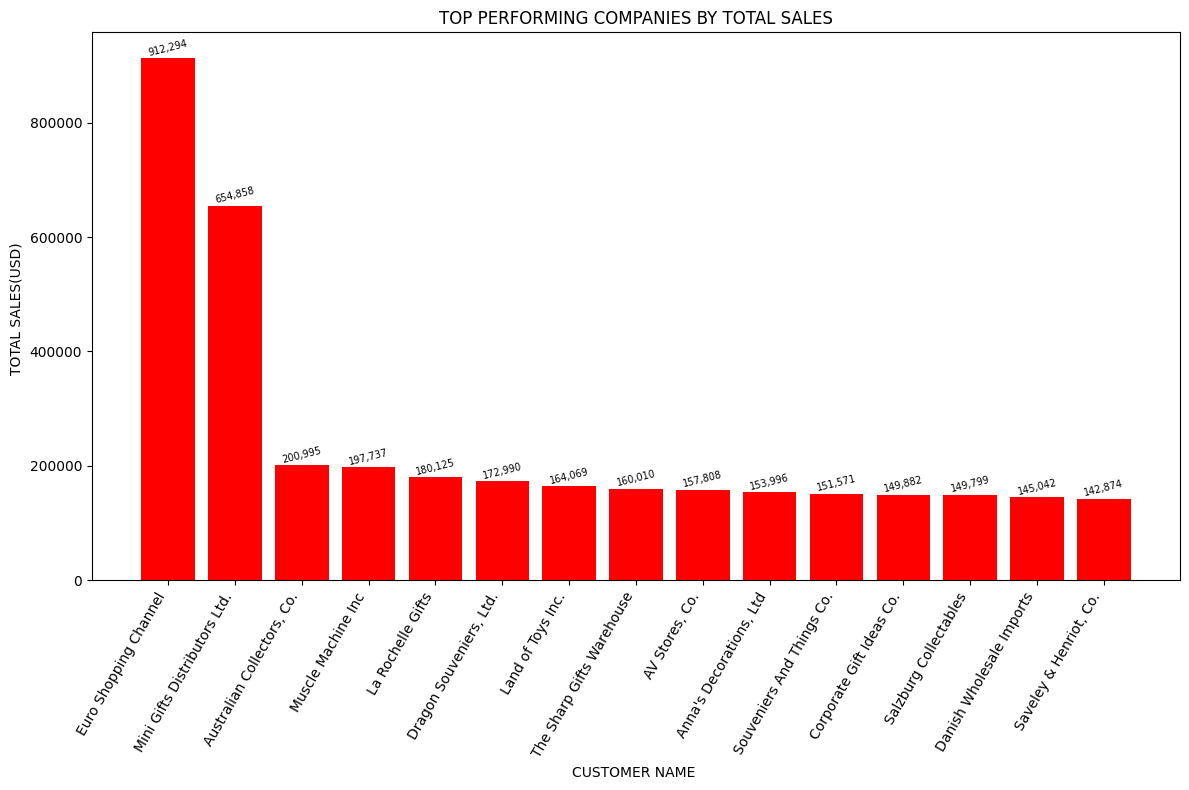

In [20]:
#bar chart 

quantity = df.groupby("CUSTOMERNAME")["SALES"].sum().sort_values(ascending=False)
top_customer = quantity.head(15)
plt.figure(figsize=(12,8))
bars = plt.bar(top_customer.index,top_customer.values,color = ["red"])
plt.title("TOP PERFORMING COMPANIES BY TOTAL SALES")
plt.xlabel("CUSTOMER NAME ")
plt.ylabel("TOTAL SALES(USD) ")
plt.xticks(rotation= 60 ,ha = "right")
plt.tight_layout()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1000, f'{yval:,.0f}', 
             ha='center', va='bottom', fontsize=7, rotation=14)

        
plt.show()






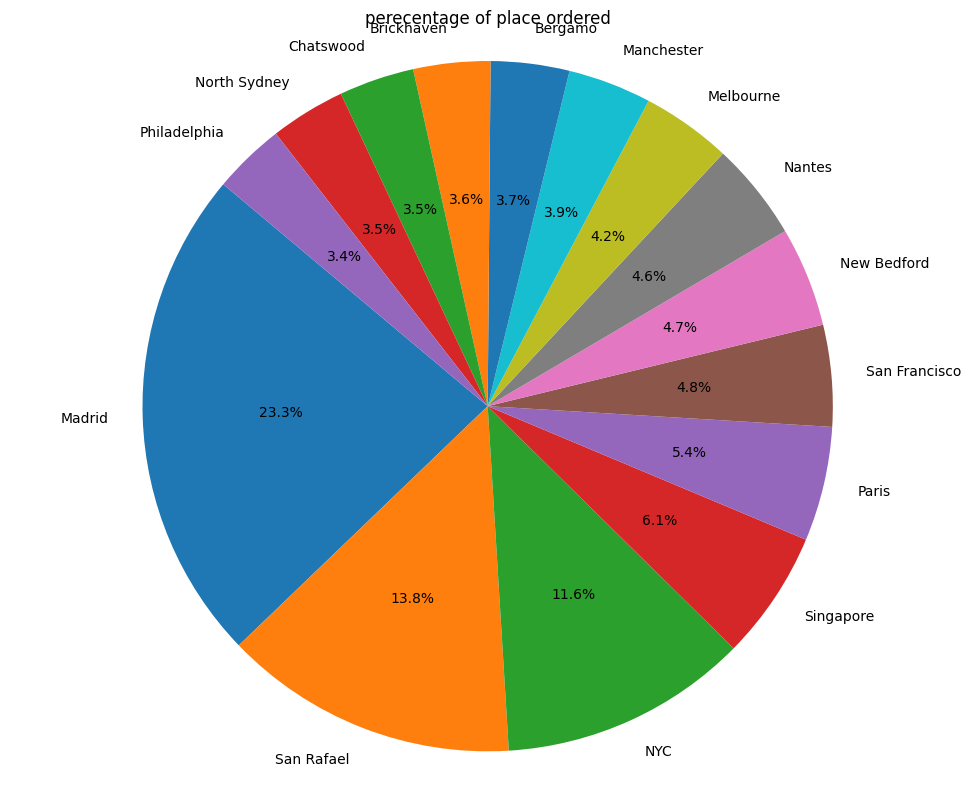

In [21]:
#pie chart 

CITY_COUNTS = df["CITY"].value_counts().head(15)
plt.figure(figsize=(10,8))
plt.pie(CITY_COUNTS,labels=CITY_COUNTS.index,autopct='%1.1f%%',startangle=140)
plt.title("perecentage of place ordered")
plt.axis("equal")
plt.tight_layout()
plt.show()

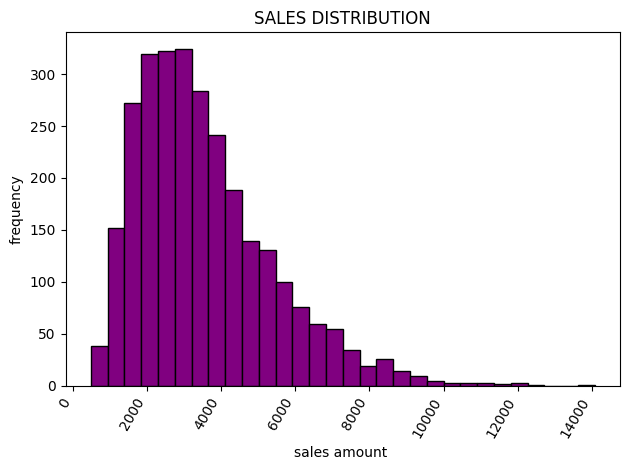

In [22]:
#histogram chart 

plt.Figure(figsize=(8,6))
plt.hist(df["SALES"], bins=30,color="purple",edgecolor = "black")
plt.title("SALES DISTRIBUTION")
plt.xlabel("sales amount ")
plt.ylabel("frequency")
plt.xticks(rotation= 60 ,ha = "right")
plt.tight_layout()
plt.show()




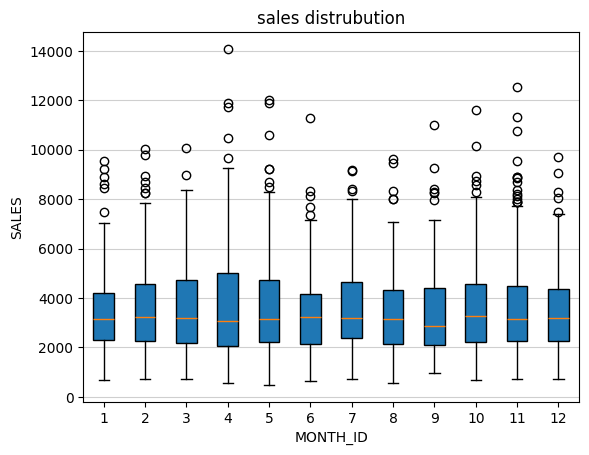

In [23]:
#BOX CURVE
MONTH_ID = sorted(df["MONTH_ID"].unique())
sale_data = [df[df["MONTH_ID"]== month]["SALES"]  for month in MONTH_ID]

plt.Figure(figsize=(10,6))
plt.boxplot(sale_data,label=MONTH_ID,patch_artist=True)
plt.xlabel("MONTH_ID")
plt.ylabel("SALES")
plt.title("sales distrubution")
plt.grid(axis="y",linestyle="-",alpha = 0.6)
plt.show()


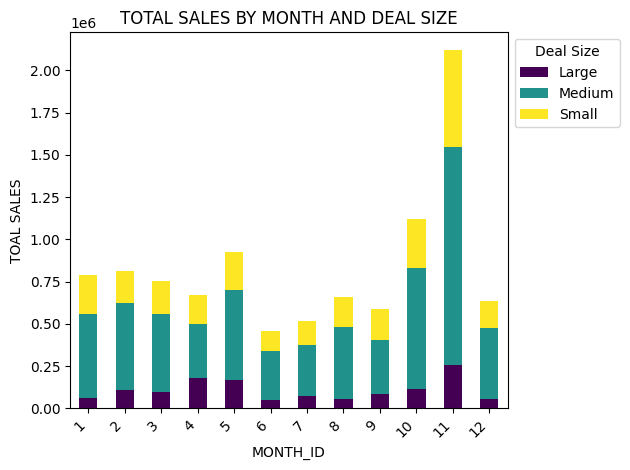

In [24]:
#stacked chart
stack = df.groupby(["MONTH_ID","DEALSIZE"])["SALES"].sum().unstack()
stack=stack.sort_index()
plt.Figure(figsize=(10,6))
stack.plot(kind = "bar", stacked = True,ax = plt.gca(),cmap="viridis")
plt.title('TOTAL SALES BY MONTH AND DEAL SIZE')
plt.xlabel('MONTH_ID')
plt.ylabel('TOAL SALES')
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Deal Size', bbox_to_anchor=(1,1), loc='upper left') 
plt.tight_layout()
plt.show()

# 📈 FINAL SUMMARY AND RECCOMANDATION

##  🔍 Insights:
- Country  USA had the highest total revenue. AND  highest sales
- Status "Shipped" orders dominate — fulfillment is strong.
- Product Line "Office Supplies" leads in quantity sold.

# 💼 Business Recommendations:
- Increase focus on top-performing countries.
- Expand inventory for best-selling product lines.
- Analyze reasons for 'Cancelled' statuses and reduce them by 10–15%.


# POWER BI 
 made a stunning dashboard for better understaning or key trends 

